<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/nike_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data dari file CSV
try:
    df = pd.read_csv("data_nike_vs_addidas_unsupervised.csv")
    print("Data berhasil di load!")
except FileNotFoundError:
    print("Error: File 'data_nike_vs_addidas_unsupervised.csv' tidak ditemukan.")
    # Jika file tidak ditemukan, berikan dataframe kosong agar code tidak error.
    df = pd.DataFrame()
except Exception as e:
    print(f"Error lainnya terjadi: {e}")
    # Jika terjadi error lainnya, juga berikan dataframe kosong agar code tidak error.
    df = pd.DataFrame()


# Menampilkan beberapa baris pertama untuk pengecekan
if not df.empty:
  print(df.head())

Data berhasil di load!
                                        Product Name Product ID  \
0  Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1               Women's adidas Originals Sleek Shoes     G27341   
2                  Women's adidas Swim Puka Slippers     CM0081   
3   Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4           Women's adidas Originals Taekwondo Shoes     D98205   

   Listing Price  Sale Price  Discount                    Brand  Rating  \
0          14999        7499        50  Adidas Adidas ORIGINALS     4.8   
1           7599        3799        50         Adidas ORIGINALS     3.3   
2            999         599        40        Adidas CORE / NEO     2.6   
3           6999        3499        50        Adidas CORE / NEO     4.1   
4           7999        3999        50         Adidas ORIGINALS     3.5   

   Reviews  
0       41  
1       24  
2       37  
3       35  
4       72  


In [2]:
# Cleaning data

if not df.empty:
  # Ubah nama kolom menjadi lebih mudah diakses
    df.columns = df.columns.str.replace(' ', '_').str.lower()

    # Handling nilai non-angka di kolom listing_price dan sale_price
    for col in ['listing_price','sale_price']:
      try:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) #ubah non angka menjadi NaN lalu di isi 0.
      except KeyError:
          print(f"Kolom {col} tidak ditemukan")

    # Handling data yang tidak konsisten di brand dan diskon
    df['brand'] = df['brand'].str.replace('Adidas ', '', regex=False)
    df['discount'] = pd.to_numeric(df['discount'], errors='coerce').fillna(0)


    #Handling missing value
    df = df.fillna(0)

  # Menampilkan informasi dataframe setelah di cleaning
    print("\nInformasi Dataframe Setelah di Cleaning:")
    print(df.info())
    print("\nDeskripsi Dataframe Setelah di Cleaning")
    print(df.describe())
else:
    print("Tidak ada data untuk dibersihkan karena dataframe kosong.")


Informasi Dataframe Setelah di Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3268 non-null   object 
 1   product_id     3268 non-null   object 
 2   listing_price  3268 non-null   int64  
 3   sale_price     3268 non-null   int64  
 4   discount       3268 non-null   int64  
 5   brand          3268 non-null   object 
 6   rating         3268 non-null   float64
 7   reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB
None

Deskripsi Dataframe Setelah di Cleaning
       listing_price    sale_price     discount       rating      reviews
count    3268.000000   3268.000000  3268.000000  3268.000000  3268.000000
mean     6868.020196   6134.265606    26.875765     3.242105    40.551714
std      4724.659386   4293.247581    22.633487     1.428856    31.543491
min   

In [3]:
# Analisis statistik deskriptif

if not df.empty:
    print("\nAnalisis Statistik Deskriptif:")

    # Analisis untuk kolom numerik
    numeric_cols = ['listing_price', 'sale_price', 'discount', 'rating', 'reviews']
    for col in numeric_cols:
      if col in df.columns:
        print(f"\nStatistik untuk Kolom {col}:")
        print(f"  Rata-rata: {df[col].mean():.2f}")
        print(f"  Median: {df[col].median():.2f}")
        print(f"  Standar Deviasi: {df[col].std():.2f}")
        print(f"  Nilai Minimum: {df[col].min():.2f}")
        print(f"  Nilai Maksimum: {df[col].max():.2f}")
      else:
        print(f"\nKolom {col} tidak ditemukan.")

    # Analisis frekuensi untuk kolom kategorikal
    categorical_cols = ['brand']
    for col in categorical_cols:
      if col in df.columns:
          print(f"\nFrekuensi untuk Kolom {col}:")
          print(df[col].value_counts())
      else:
          print(f"\nKolom {col} tidak ditemukan.")
else:
    print("Tidak ada data untuk dianalisis karena dataframe kosong.")


Analisis Statistik Deskriptif:

Statistik untuk Kolom listing_price:
  Rata-rata: 6868.02
  Median: 5999.00
  Standar Deviasi: 4724.66
  Nilai Minimum: 0.00
  Nilai Maksimum: 29999.00

Statistik untuk Kolom sale_price:
  Rata-rata: 6134.27
  Median: 4799.00
  Standar Deviasi: 4293.25
  Nilai Minimum: 449.00
  Nilai Maksimum: 36500.00

Statistik untuk Kolom discount:
  Rata-rata: 26.88
  Median: 40.00
  Standar Deviasi: 22.63
  Nilai Minimum: 0.00
  Nilai Maksimum: 60.00

Statistik untuk Kolom rating:
  Rata-rata: 3.24
  Median: 3.50
  Standar Deviasi: 1.43
  Nilai Minimum: 0.00
  Nilai Maksimum: 5.00

Statistik untuk Kolom reviews:
  Rata-rata: 40.55
  Median: 37.00
  Standar Deviasi: 31.54
  Nilai Minimum: 0.00
  Nilai Maksimum: 223.00

Frekuensi untuk Kolom brand:
brand
CORE / NEO           1111
ORIGINALS             908
Nike                  643
SPORT PERFORMANCE     606
Name: count, dtype: int64



Visualisasi Data:


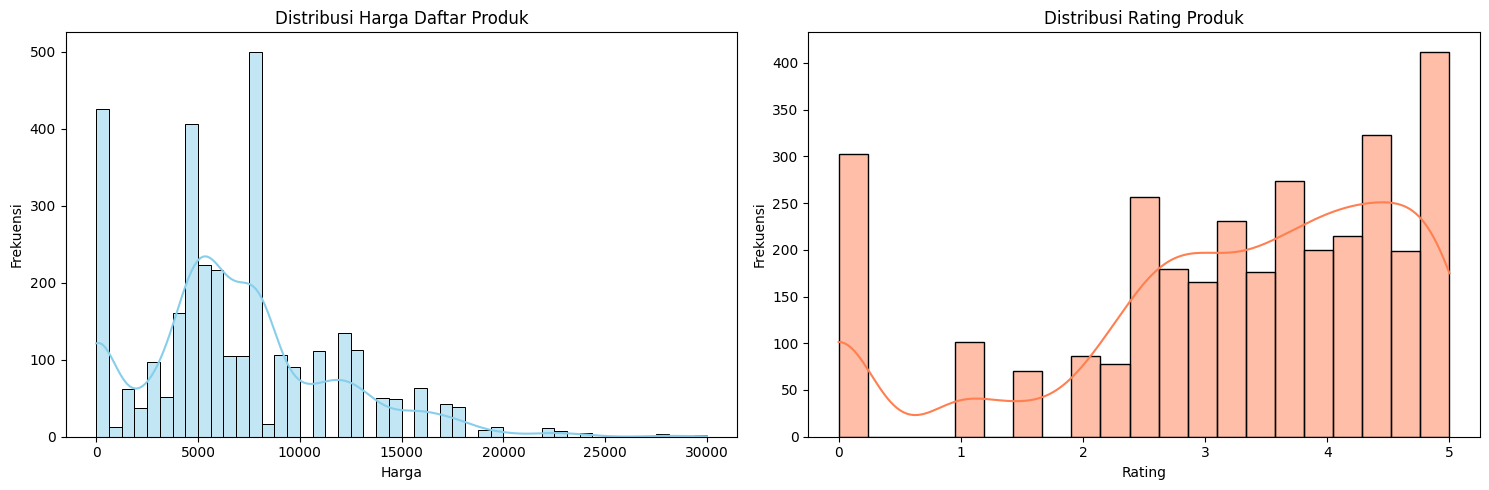

<ipython-input-4-742996ccef0d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='sale_price', data=df, estimator=np.mean, palette='viridis')


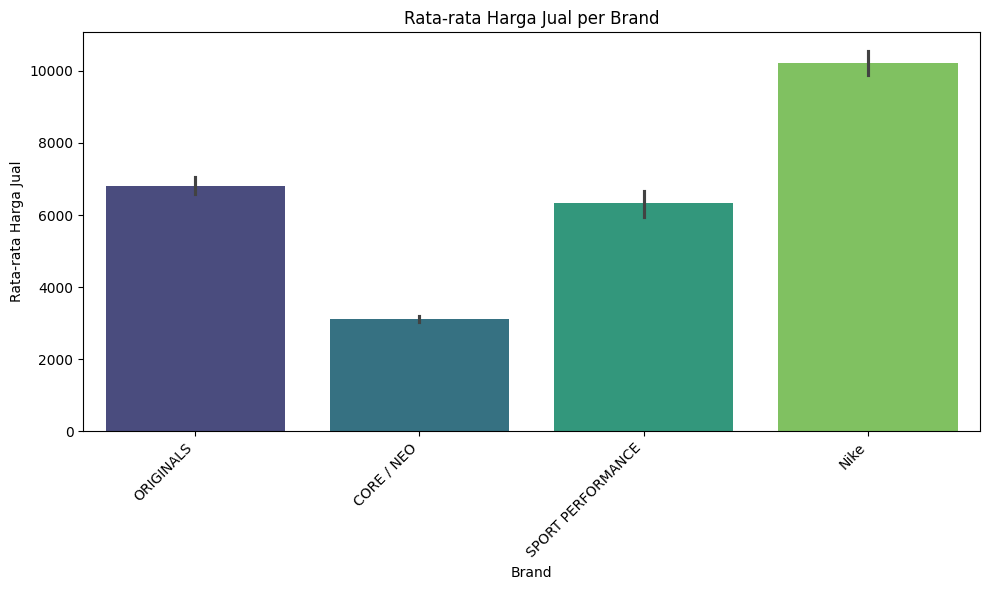

<ipython-input-4-742996ccef0d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand',y='discount', data=df, palette='magma')


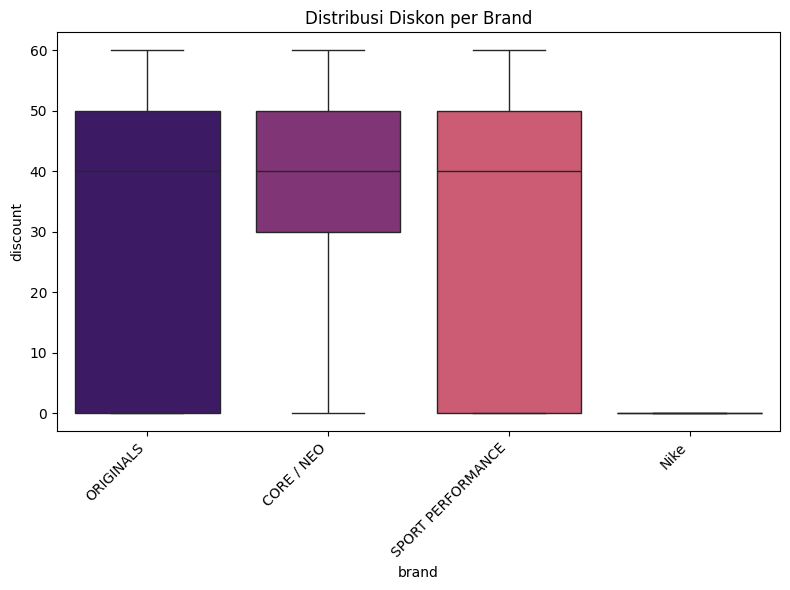

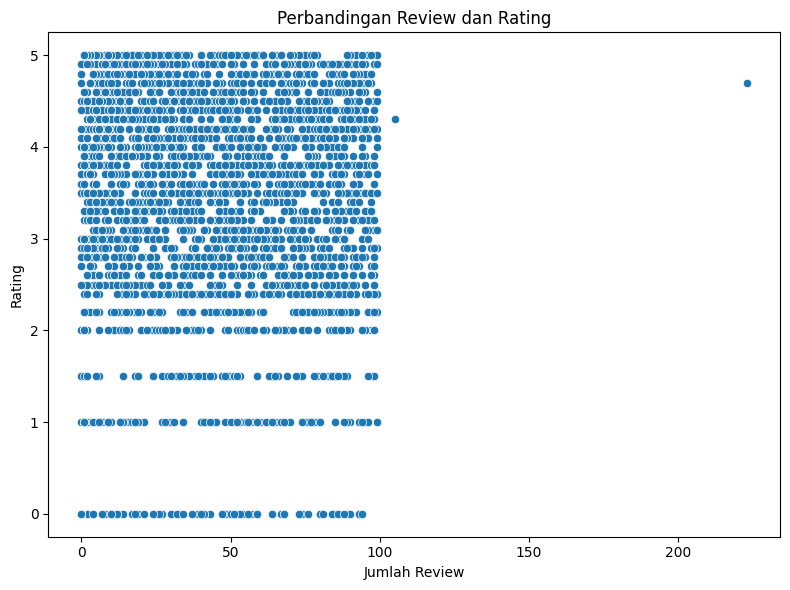

In [4]:
# Visualisasi data

if not df.empty:
    print("\nVisualisasi Data:")
  # Visualisasi distribusi harga dan rating

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Distribusi listing_price
    sns.histplot(df['listing_price'], kde=True, ax=axes[0],color = 'skyblue')
    axes[0].set_title('Distribusi Harga Daftar Produk')
    axes[0].set_xlabel('Harga')
    axes[0].set_ylabel('Frekuensi')

    # Distribusi rating
    sns.histplot(df['rating'], kde=True, ax=axes[1],color = 'coral')
    axes[1].set_title('Distribusi Rating Produk')
    axes[1].set_xlabel('Rating')
    axes[1].set_ylabel('Frekuensi')

    plt.tight_layout()
    plt.show()

  # Visualisasi rata-rata harga jual per brand
    plt.figure(figsize=(10, 6))
    sns.barplot(x='brand', y='sale_price', data=df, estimator=np.mean, palette='viridis')
    plt.title('Rata-rata Harga Jual per Brand')
    plt.xlabel('Brand')
    plt.ylabel('Rata-rata Harga Jual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Visualisasi discount
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='brand',y='discount', data=df, palette='magma')
    plt.title("Distribusi Diskon per Brand")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

  #Visualisasi perbandingan review dan rating
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='reviews', y='rating', data=df)
    plt.title("Perbandingan Review dan Rating")
    plt.xlabel('Jumlah Review')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data untuk divisualisasikan karena dataframe kosong.")